# 导入库

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
%matplotlib inline
import lightgbm as lgb
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 导入数据集

In [16]:
path = '/home/jamkey/worksapce/datawhale/data.csv'
dataset_raw = pd.read_csv(path, encoding = 'gbk')

# 数据基本情况

In [17]:
dataset_raw.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [18]:
#样本及特征数量
print(dataset_raw.shape)

(4754, 90)


In [19]:
#数据集特征名称
dataset_raw.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

In [20]:
# 数据集分布
dataset_raw.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [21]:
#数据集特征类型
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [22]:
#数据集缺失数量
#模型用lgb,先不考虑缺失值处理
dataset_raw.isnull().sum()

Unnamed: 0                                  0
custid                                      0
trade_no                                    0
bank_card_no                                0
low_volume_percent                          2
middle_volume_percent                       2
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
student_feature                          2998
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_amount                     0
historical_trans_day                        2
rank_trad_1_month                 

# 数据基本处理

In [23]:
df = dataset_raw.copy()

In [24]:
# objetc类型的数据
object_list = ['trade_no', 'bank_card_no', 'reg_preference_for_trad', 'source', 'id_name','latest_query_time', 'loans_latest_time']
df[object_list].head()

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
0,20180507115231274000000023057383,卡号1,一线城市,xs,蒋红,2018-04-25,2018-04-19
1,20180507121002192000000023073000,卡号1,一线城市,xs,崔向朝,2018-05-03,2018-05-05
2,20180507125159718000000023114911,卡号1,一线城市,xs,王中云,2018-05-05,2018-05-01
3,20180507121358683000000388283484,卡号1,三线城市,xs,何洋洋,2018-05-05,2018-05-03
4,20180507115448545000000388205844,卡号1,一线城市,xs,赵洋,2018-04-15,2018-01-07


In [25]:
df.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [26]:
# 1,3都只有一个取值,drop
# 2考虑做one_hot
print(df['bank_card_no'].value_counts())
print(df['reg_preference_for_trad'].value_counts())
print(df['source'].value_counts())

卡号1    4754
Name: bank_card_no, dtype: int64
一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64
xs    4754
Name: source, dtype: int64


# pipeline

In [43]:
print('处理前的样本数和特征数 : {}'.format(df.shape))
#日期处理,提取月份等特征
#注意命名,原数据集中已有 latest_query_day,loans_latest_day, 两者意义不同
df['latest_query_time'] = pd.to_datetime(df['latest_query_time'])
df['latestQueryMonth'] = df['latest_query_time'].dt.month
df['latestQueryDay'] = df['latest_query_time'].dt.day
df['loans_latest_time'] = pd.to_datetime(df['loans_latest_time'])
df['loansLatestMonth'] = df['loans_latest_time'].dt.month
df['loansLatestDay'] = df['loans_latest_time'].dt.day
# df[['latest_query_day', 'latestQueryDay']].head()

# 对 reg_preference_for_trad 做one-hot
city = pd.get_dummies(df['reg_preference_for_trad'])
city_df = df.join(city)

drop_list = ['Unnamed: 0','custid', 'trade_no', 'bank_card_no','reg_preference_for_trad', 'source', 'id_name', 
             'latest_query_time', 'loans_latest_time', ]
dataset_df = city_df.drop(drop_list, axis = 1)

# 缺失值处理
columns=list(dataset_df)
imp = Imputer(missing_values='NaN', strategy='mean')
dataset_df=imp.fit_transform(dataset_df)
dataset_df=pd.DataFrame(dataset_df,columns = columns)
print('处理后的样本数和特征数 : {}'.format(dataset_df.shape))

处理前的样本数和特征数 : (4754, 94)
处理后的样本数和特征数 : (4754, 90)


In [44]:
#按三七比例分为训练集和测试集
feature = dataset_df.drop(['status'], axis = 1)
label = dataset_df['status']
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 2018)
print("训练集:", X_train.shape, y_train.shape)
print("测试集:", X_test.shape, y_test.shape)

训练集: (3327, 89) (3327,)
测试集: (1427, 89) (1427,)


In [ ]:
# dataset_df.info()

# RFECV特征筛选

The optimal number of features is 83
The selected features are:
['low_volume_percent', 'middle_volume_percent', 'take_amount_in_later_12_month_highest', 'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'regional_mobility', 'student_feature', 'repayment_capability', 'is_high_user', 'number_of_trans_from_2011', 'first_transaction_time', 'historical_trans_amount', 'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month', 'avg_consume_less_12_valid_month', 'abs', 'top_trans_count_last_1_month', 'avg_price_last_12_month', 'avg_price_top_last_12_valid_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 'cross_consume_count_last_1_month', 'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month', 'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 'ma

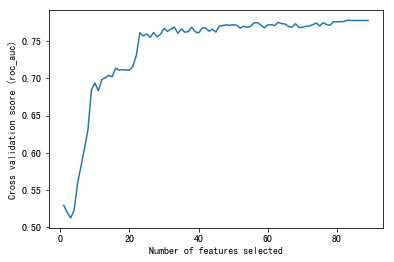

In [49]:
gbm = lgb.LGBMRegressor()
selector = RFECV(estimator=gbm, step=1, cv = 5, scoring = 'roc_auc')
selector.fit(X_train, y_train)

print('The optimal number of features is {}'.format(selector.n_features_))
features = [f for f,s in zip(X_train.columns, selector.support_) if s]
print('The selected features are:')
print ('{}'.format(features))

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (roc_auc)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
# plt.savefig('feature_auc_nselected.png', bbox_inches='tight', pad_inches=1)

In [50]:
features = ['low_volume_percent', 'middle_volume_percent', 'take_amount_in_later_12_month_highest', 
            'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 
            'trans_days_interval_filter', 'trans_days_interval', 'regional_mobility', 'student_feature', 
            'repayment_capability', 'is_high_user', 'number_of_trans_from_2011', 'first_transaction_time', 
            'historical_trans_amount', 'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month', 
            'avg_consume_less_12_valid_month', 'abs', 'top_trans_count_last_1_month', 'avg_price_last_12_month', 
            'avg_price_top_last_12_valid_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 
            'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 'cross_consume_count_last_1_month', 
            'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month', 
            'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 
            'max_cumulative_consume_later_1_month', 'max_consume_count_later_6_month', 
            'railway_consume_count_last_12_month', 'pawns_auctions_trusts_consume_last_1_month', 
            'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day', 'trans_day_last_12_month', 
            'apply_score', 'apply_credibility', 'query_org_count', 'query_finance_count', 'query_cash_count', 
            'query_sum_count', 'latest_one_month_apply', 'latest_three_month_apply', 'latest_six_month_apply', 
            'loans_score', 'loans_credibility_behavior', 'loans_count', 'loans_settle_count', 'loans_overdue_count', 
            'loans_org_count_behavior', 'consfin_org_count_behavior', 'loans_cash_count', 'latest_one_month_loan', 
            'latest_three_month_loan', 'latest_six_month_loan', 'history_suc_fee', 'history_fail_fee', 
            'latest_one_month_suc', 'latest_one_month_fail', 'loans_long_time', 'loans_credit_limit', 
            'loans_credibility_limit', 'loans_product_count', 'loans_max_limit', 'loans_avg_limit', 
            'consfin_credit_limit', 'consfin_credibility', 'consfin_product_count', 'consfin_max_limit', 
            'consfin_avg_limit', 'latest_query_day', 'loans_latest_day', 'latestQueryMonth', 'latestQueryDay', 
            'loansLatestMonth', 'loansLatestDay', '一线城市', '三线城市']

X_train = X_train[features]
X_test = X_test[features]

# 模型训练

In [51]:
params = {
    'boosting_type': 'gbdt', 
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.1, 
    'num_leaves': 50, 
    'max_depth': 5,
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    }
train_data = lgb.Dataset(X_train, label=y_train.values)
bst = lgb.cv(params,train_data, num_boost_round=1000, nfold=5, early_stopping_rounds=200)
model = lgb.train(params,train_data,num_boost_round=len(bst['auc-mean']))

# 模型预测

In [52]:
prediction = model.predict(X_test)
prediction = [round(x)for x in prediction]
y_test.values
print('准确率为:', accuracy_score(y_test.values, prediction))

准确率为: 0.7855641205325858
